# Face detectation

In [1]:
!pip install mtcnn

In [2]:
import cv2
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

In [3]:
from os import path, mkdir

video = 'video/faces.mp4'
frames_dir = 'faces/'

if not path.exists(frames_dir):
    mkdir(frames_dir)

In [4]:
cap = cv2.VideoCapture(video)

video_frame = 30

id_frame = 0

ret = True
while ret:
    ret, frame = cap.read()

    if (id_frame % video_frame) == 0 and ret:

        try:

            result = detector.detect_faces(frame)

            for i, item in enumerate(result):
                bounding_box = item['box']

                x = bounding_box[0]
                y = bounding_box[1]
                w = bounding_box[2]
                h = bounding_box[3]

                crop_bbox = frame[y:y+h, x:x+w]
                cv2.imwrite(frames_dir + str(id_frame) + '_' + str(i) + '.png', crop_bbox)
        except:
            pass

    id_frame += 1

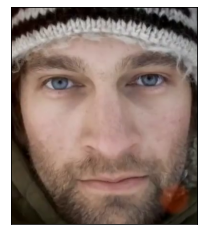

In [5]:
from matplotlib import pyplot as plt

frame = cv2.imread('faces/60_0.png')[:,:,::-1]
plt.imshow(frame)
plt.xticks([]); plt.yticks([])
plt.show()

In [6]:
from matplotlib.patches import Rectangle

def save_image(filename, result_list):
    data = plt.imread(filename)

    plt.imshow(data)

    ax = plt.gca()

    for result in result_list:
        x, y, w, h = result['box']
        rec = Rectangle((x, y), w, h, fill=False, color='red')
        ax.add_patch(rec)

    plt.savefig('iresult.png')
    img = cv2.imread(filename)

    crop_bbox = img[y:y+h, x:x+w]
    cv2.imwrite('crop1.png', crop_bbox)

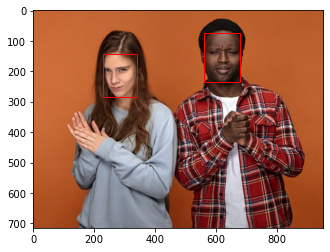

In [7]:
filename = 'imagens/imagem0001.jpg'
pixels = plt.imread(filename)

detector = MTCNN()

faces = detector.detect_faces(pixels)

save_image(filename, faces)

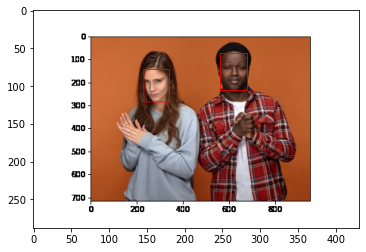

In [8]:
img = cv2.imread('iresult.png')[:,:,::-1]
plt.imshow(img)